This script loads a ground truth and an XGBoost prediction file with TF-peak-TG edges and compares the distribution of prediction scores for edges in the ground truth vs edges not in the ground truth.

In [1]:
!hostnamectl

   Static hostname: psh01com1hcom38
         Icon name: computer-server
           Chassis: server
        Machine ID: f595c663a79a44babee9505e2f7c5869
           Boot ID: a0eb5561be9f42b4b0f45c832eafc0bf
  Operating System: ]8;;https://www.redhat.com/Red Hat Enterprise Linux 8.10 (Ootpa)]8;;
       CPE OS Name: cpe:/o:redhat:enterprise_linux:8::baseos
            Kernel: Linux 4.18.0-553.22.1.el8_10.x86_64
      Architecture: x86-64


In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_ground_truth(ground_truth_file):
    ground_truth = pd.read_csv(ground_truth_file, sep='\t', quoting=csv.QUOTE_NONE, on_bad_lines='skip', header=0)
    ground_truth = ground_truth.rename(columns={"Source": "source_id", "Target": "target_id"})
    return ground_truth

ground_truth_file = "/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SC_MO_TRN_DB.MIRA/REPOSITORY/CURRENT/REFERENCE_NETWORKS/RN111_ChIPSeq_BEELINE_Mouse_ESC.tsv"
ground_truth_df = read_ground_truth(ground_truth_file)

In [4]:
pred_df = pd.read_csv("/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/output/mESC/filtered_L2_E7.5_rep2_old/model_predictions/filtered_L2_E7.5_vs_DS011_xgb_pred_no_peak_agg.tsv", sep="\t", header=0, index_col=None)

Compare the TF-TG edges between the ground truth and prediction dataframes to label the True / False values

In [5]:
pred_df["label"] = pred_df.set_index(
    ["source_id", "target_id"]
).index.isin(
    ground_truth_df.set_index(["source_id", "target_id"]).index
)

In [6]:
true_edge_df = pred_df[pred_df["label"] == True]
false_edge_df = pred_df[pred_df["label"] == False]

true_len = true_edge_df.shape[0]
false_len = true_edge_df.shape[0]

min_edges = min(true_len, false_len)

true_edge_sample = true_edge_df.sample(min_edges)
false_edge_sample = false_edge_df.sample(min_edges)

balanced_edges_df = pd.concat([true_edge_sample, false_edge_sample])

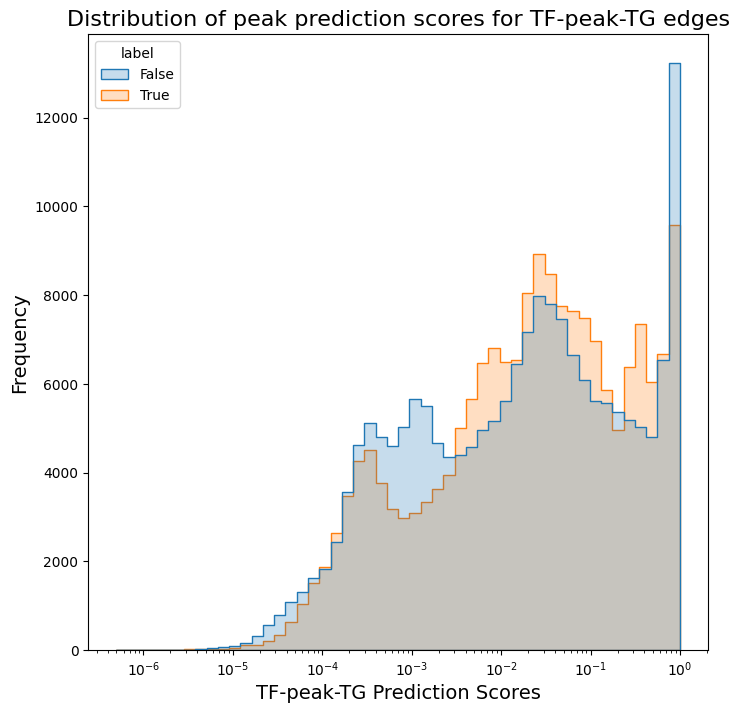

In [16]:
plt.figure(figsize=(8,8))
sns.histplot(data=balanced_edges_df, x="score", hue="label", bins=50, log_scale=True, element="step", stat="count")
plt.title("Distribution of peak prediction scores for TF-peak-TG edges", fontsize=16)
plt.xlabel("TF-peak-TG Prediction Scores", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [7]:
balanced_edges_df

,source_id,target_id,score,label
2727378,TBP,NFKBIB,0.238128,True
1674567,NANOG,MEIS1,0.000188,True
2784853,TCF12,CCNH,0.604460,True
372372,E2F1,TAF7,0.022810,True
2819148,TCF3,ZAP70,0.089887,True
...,...,...,...,...
2215770,SIX2,RPL38,0.000421,False
2189927,RXRG,TCF19,0.208043,False
555836,ESRRB,CLDN7,0.001378,False
2655129,STAT3,TBX21,0.001520,False


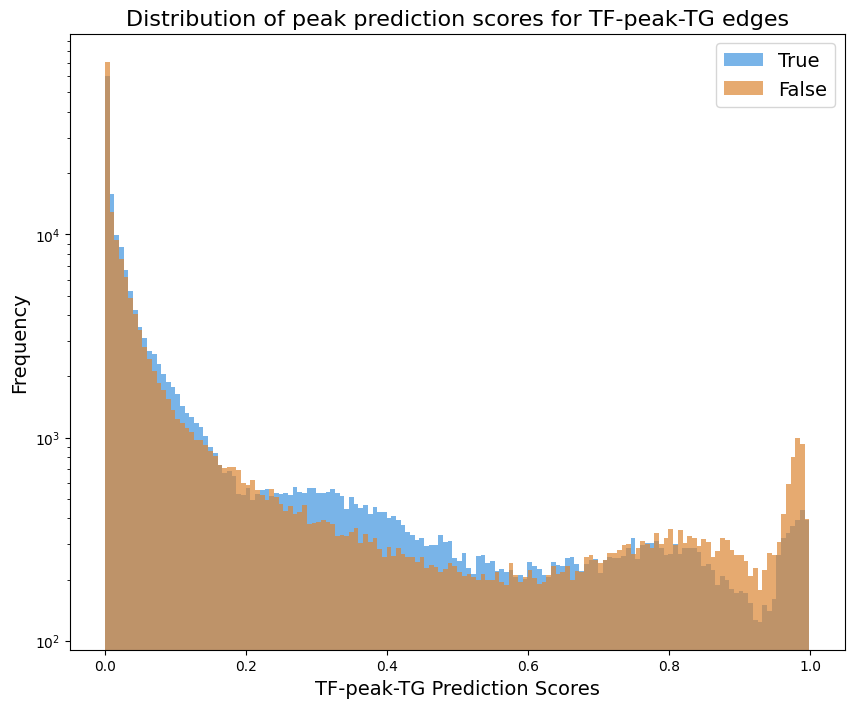

In [17]:
true_scores = balanced_edges_df[balanced_edges_df["label"] == True]
false_scores = balanced_edges_df[balanced_edges_df["label"] == False]
plt.figure(figsize=(10,8))
plt.hist(
    true_scores["score"],
    bins=150,
    alpha=0.7,
    color='#4195df',
    label="True",
    log=True
)
plt.hist(
    false_scores["score"],
    bins=150,
    alpha=0.7,
    color='#dc8634',
    label="False",
    log=True
)
plt.title("Distribution of peak prediction scores for TF-peak-TG edges", fontsize=16)
plt.xlabel("TF-peak-TG Prediction Scores", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=14, loc="upper right")
